⚠ الملف موجود بالفعل: inputs/input_n1000.txt
⚠ الملف موجود بالفعل: inputs/input_n100000.txt
⚠ الملف موجود بالفعل: inputs/input_n10000000.txt
⚠ الملف موجود بالفعل: inputs/input_n100000000.txt

=== حجم البيانات: n = 1000 ===
Mergesort: الوقت = 0.0017 ثانيه , المقارنات = 8694, الحركات = 9976
Quicksort: الوقت = 0.0015 ثانيه , المقارنات = 10938, الحركات = 15038
Heapsort: الوقت = 0.0022 ثانيه , المقارنات = 16867, الحركات = 18194

=== حجم البيانات: n = 100000 ===
Mergesort: الوقت = 0.2777 ثانيه , المقارنات = 1536031, الحركات = 1668928
Quicksort: الوقت = 0.2303 ثانيه , المقارنات = 1958604, الحركات = 2282338
Heapsort: الوقت = 0.4218 ثانيه , المقارنات = 3019230, الحركات = 3149386

=== حجم البيانات: n = 10000000 ===
Mergesort: الوقت = 51.7004 ثانيه , المقارنات = 220102476, الحركات = 233222784
Quicksort: الوقت = 60.2354 ثانيه , المقارنات = 293349183, الحركات = 342899452
Heapsort: الوقت = 123.7161 ثانيه , المقارنات = 434642641, الحركات = 447670724

=== حجم البيانات: n = 100000000 ===
Mergesort: الو

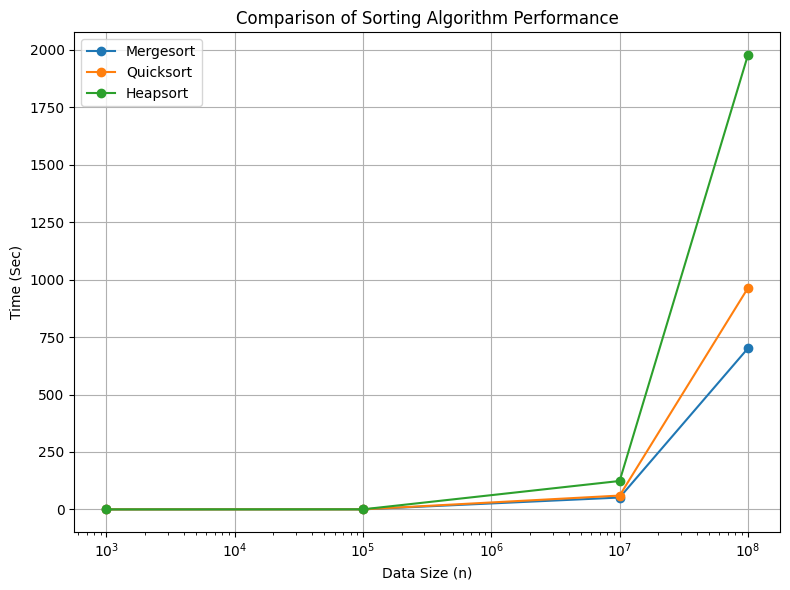

 تم حفظ الرسم البياني في sorting_performance.png


In [1]:
import random
import time
import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# زيادة حد الاستدعاء العميق لـ Mergesort
sys.setrecursionlimit(10**8)


class Counter:
    """عداد لقياس عدد المقارنات وعدد الحركات"""
    def __init__(self):
        self.comparisons = 0
        self.moves = 0


# ========== Mergesort ==========
def mergesort(arr):
    cnt = Counter()

    def merge(left, right):
        i = j = 0
        merged = []
        while i < len(left) and j < len(right):
            cnt.comparisons += 1
            if left[i] <= right[j]:
                merged.append(left[i])
                i += 1
            else:
                merged.append(right[j])
                j += 1
            cnt.moves += 1
        merged.extend(left[i:])
        merged.extend(right[j:])
        cnt.moves += (len(left) - i) + (len(right) - j)
        return merged

    def _mergesort(a):
        if len(a) <= 1:
            return a
        mid = len(a) // 2
        left = _mergesort(a[:mid])
        right = _mergesort(a[mid:])
        return merge(left, right)

    sorted_arr = _mergesort(arr)
    return sorted_arr, cnt


# ========== Quicksort ==========
def quicksort(arr):
    cnt = Counter()
    a = arr[:]

    def partition(lo, hi):
        pivot_index = random.randint(lo, hi)
        a[pivot_index], a[hi] = a[hi], a[pivot_index]
        cnt.moves += 2
        pivot = a[hi]
        i = lo - 1
        for j in range(lo, hi):
            cnt.comparisons += 1
            if a[j] <= pivot:
                i += 1
                a[i], a[j] = a[j], a[i]
                cnt.moves += 2
        a[i + 1], a[hi] = a[hi], a[i + 1]
        cnt.moves += 2
        return i + 1

    def _quicksort(lo, hi):
        while lo < hi:
            p = partition(lo, hi)
            if p - lo < hi - p:
                _quicksort(lo, p - 1)
                lo = p + 1
            else:
                _quicksort(p + 1, hi)
                hi = p - 1

    _quicksort(0, len(a) - 1)
    return a, cnt


# ========== Heapsort ==========
def heapsort(arr):
    cnt = Counter()
    a = arr[:]
    n = len(a)

    def heapify(n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n:
            cnt.comparisons += 1
            if a[left] > a[largest]:
                largest = left
        if right < n:
            cnt.comparisons += 1
            if a[right] > a[largest]:
                largest = right
        if largest != i:
            a[i], a[largest] = a[largest], a[i]
            cnt.moves += 2
            heapify(n, largest)

    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)
    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        cnt.moves += 2
        heapify(i, 0)

    return a, cnt


# ========== إنشاء وحفظ ملفات الإدخال ==========
def generate_input_files(sizes, folder="inputs"):
    Path(folder).mkdir(exist_ok=True)
    for n in sizes:
        filename = Path(folder) / f"input_n{n}.txt"
        if filename.exists():
            print(f"⚠ الملف موجود بالفعل: {filename}")
            continue
        print(f"🔹 إنشاء ملف إدخال لحجم n = {n} ...")
        random.seed(42)  # لضمان نفس القيم كل مرة
        with open(filename, "w") as f:
            for _ in range(n):
                f.write(f"{random.randint(1, n)}\n")
        print(f" تم إنشاء الملف: {filename}")


# ========== تجربة الخوارزميات على ملفات الإدخال ==========
def run_test_from_file(n, folder, results):
    filename = Path(folder) / f"input_n{n}.txt"
    with open(filename, "r") as f:
        arr = [int(line.strip()) for line in f]

    print(f"\n=== حجم البيانات: n = {n} ===")
    for name, func in [("Mergesort", mergesort), ("Quicksort", quicksort), ("Heapsort", heapsort)]:
        data_copy = arr[:]
        start = time.time()
        sorted_arr, stats = func(data_copy)
        end = time.time()
        time_taken = end - start
        print(f"{name}: الوقت = {time_taken:.4f} ثانيه , المقارنات = {stats.comparisons}, الحركات = {stats.moves}")
        results.append([n, name, time_taken, stats.comparisons, stats.moves])


# ========== البرنامج الرئيسي ==========
if __name__ == "__main__":
    sizes = [10**3, 10**5, 10**7, 10**8]
    input_folder = "inputs"
    results = []

    # 1. إنشاء ملفات الإدخال
    generate_input_files(sizes, input_folder)

    # 2. تشغيل الخوارزميات على الملفات
    for n in sizes:
        run_test_from_file(n, input_folder, results)

    # 3. حفظ النتائج في CSV
    with open("sorting_results.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["n", "Algorithm", "Time (s)", "Comparisons", "Moves"])
        writer.writerows(results)
    print("\n تم حفظ النتائج في sorting_results.csv")

    # 4. رسم الأداء
    df = pd.DataFrame(results, columns=["n", "Algorithm", "Time (s)", "Comparisons", "Moves"])
    plt.figure(figsize=(8, 6))
    for algo in df["Algorithm"].unique():
        subset = df[df["Algorithm"] == algo]
        plt.plot(subset["n"], subset["Time (s)"], marker="o", label=algo)

    plt.xscale("log", base=10)
    plt.xlabel("Data Size (n)")
    plt.ylabel("Time (Sec)")
    plt.title("Comparison of Sorting Algorithm Performance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("sorting_performance.png", dpi=150)
    plt.show()
    print(" تم حفظ الرسم البياني في sorting_performance.png")